In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression,nice_string_output, add_text_to_ax
from scipy.stats import binom, poisson, norm
from Rolling_ball_functions import data_sorting,data_import,mean_func
from Universal_functions import weighted_mean,uncertainty_weighted

In [2]:
def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    from IPython.core.display import Latex
    from sympy import * 
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    return display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [5]:
Data=pd.read_csv("../data/data_setup.csv")

In [6]:
Laser_1=weighted_mean(np.array(Data.laser_1.dropna()),np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2=weighted_mean(np.array(Data.laser_2.dropna()),np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3=weighted_mean(np.array(Data.laser_3.dropna()),np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4=weighted_mean(np.array(Data.laser_4.dropna()),np.array(Data.laser_4_std.dropna())) *10**(-2)
Laser_1_std=uncertainty_weighted(np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2_std=uncertainty_weighted(np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3_std=uncertainty_weighted(np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4_std=uncertainty_weighted(np.array(Data.laser_4_std.dropna()))*10**(-2)
Length_slope=np.array([Laser_1,Laser_2,Laser_3,Laser_4])
Length_slope_std=np.array([Laser_1_std,Laser_2_std,Laser_3_std,Laser_4_std])

In [7]:
Number_of_datasets=5
skiprows_pd=15
location="../data/slope/"

In [8]:
Time_big,Voltages_big=data_import(5,"exported_data_big_ball_acc_",15,location)
Time_small,Voltages_small=data_import(5,"exported_data_acc_small_ball_",15,location)
Time_big_180,Voltages_big_180=data_import(5,"exported_data_acc_small_180_deg_",15,location)
Time_small_180,Voltages_small_180=data_import(5,"exported_data_acc_big_ball_180_deg_",15,location)

In [9]:
Delta_T_big,Delta_T_big_std=mean_func(Time_big,Voltages_big)
Delta_T_small,Delta_T_small_std=mean_func(Time_small,Voltages_small)
Delta_T_big_180,Delta_T_big_180_std=mean_func(Time_big_180,Voltages_big_180)
Delta_T_small_180,Delta_T_small_180_std=mean_func(Time_small_180,Voltages_small_180)

In [10]:
def fit_function_Lin(x, slope, intersection):
    return intersection+ 1/2*slope*x**2 
def fit_multiple(func,x,y,y_std):
    fit_slope=[]
    slope_uncertainty=[]
    fit_intersection=[]
    intersection_uncertainty=[]
    for i in range(len(y)):
        chi2_object=Chi2Regression(func,x[i],y, y_std)
        minuitLin = Minuit(chi2_object, pedantic=False, intersection=0, slope=1, print_level=0) 
        minuitLin.migrad();
        fit_slope.append(minuitLin.args[0])
        slope_uncertainty.append(minuitLin.errors["slope"])
        fit_intersection.append(minuitLin.args[1])
        intersection_uncertainty.append(minuitLin.errors["intersection"])
    return np.array(fit_slope),np.array(fit_intersection),np.array(slope_uncertainty),np.array(intersection_uncertainty)

In [11]:
slope_big,slope_big_uncertainty,intersection_big,intersection_big_uncertainty=fit_multiple(fit_function_Lin,Delta_T_big,Length_slope,Length_slope_std)
big_weighted_slope,big_uncertainty_slope=weighted_mean(slope_big,slope_big_uncertainty),uncertainty_weighted(slope_big_uncertainty)
big_weighted_intersection,big_uncertainty_intersection=weighted_mean(intersection_big,intersection_big_uncertainty),uncertainty_weighted(intersection_big_uncertainty)

In [12]:
slope_,slope_big_uncertainty,intersection_big,intersection_big_uncertainty=fit_multiple(fit_function_Lin,Delta_T_big,Length_slope,Length_slope_std)
big_weighted_slope,big_uncertainty_slope=weighted_mean(slope_big,slope_big_uncertainty),uncertainty_weighted(slope_big_uncertainty)
big_weighted_intersection,big_uncertainty_intersection=weighted_mean(intersection_big,intersection_big_uncertainty),uncertainty_weighted(intersection_big_uncertainty)

In [13]:
x=np.linspace(0,max(Length_slope),100)

[0.      0.22645 0.4271  0.6107 ]


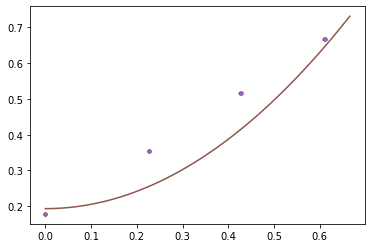

In [18]:
print(Delta_T_big[0])
plt.plot(Delta_T_big[0],Length_slope,'.')
plt.plot(Delta_T_big[1],Length_slope,'.')
plt.plot(Delta_T_big[2],Length_slope,'.')
plt.plot(Delta_T_big[3],Length_slope,'.')
plt.plot(Delta_T_big[4],Length_slope,'.')
plt.plot(x,fit_function_Lin(x,big_weighted_slope,big_weighted_intersection)+0.19)

In [20]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,dTd,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta, sigma_Delta ,sigma_a,sigma_g")

In [25]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2+(g.diff(T2)*dTd)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## weigthed_ball_sections

In [26]:
big_ball=weighted_mean(np.array(Data.big_ball.dropna()),np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball=weighted_mean(np.array(Data.small_ball.dropna()),np.array(Data.small_all_std.dropna()))*10**(-3)
big_ball_std=uncertainty_weighted(np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball_std=uncertainty_weighted(np.array(Data.small_all_std.dropna()))*10**(-3)

## weighted_Angle

In [27]:
angle=weighted_mean(np.array(Data.angle .dropna()),np.array(Data.angle_std.dropna()))
angle_180 =weighted_mean(np.array(Data.angle_180.dropna()),np.array(Data.angle_180_std.dropna()))
angle_std=uncertainty_weighted(np.array(Data.angle_std.dropna()))
angle_180_std=uncertainty_weighted(np.array(Data.angle_180_std.dropna()))

## d_rail

In [28]:
d_rail=weighted_mean(np.array(Data.d_rail.dropna()),np.array(Data.d_rail_std.dropna()))*10**(-3)
d_rail_std=uncertainty_weighted(Data.d_rail_std)*10**(-3)

## laser lengths

In [32]:
Laser_1=weighted_mean(np.array(Data.laser_1.dropna()),np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2=weighted_mean(np.array(Data.laser_2.dropna()),np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3=weighted_mean(np.array(Data.laser_3.dropna()),np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4=weighted_mean(np.array(Data.laser_4.dropna()),np.array(Data.laser_4_std.dropna()))*10**(-2)

In [33]:
Laser_1=uncertainty_weighted(np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2=uncertainty_weighted(np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3=uncertainty_weighted(np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4=uncertainty_weighted(np.array(Data.laser_4_std.dropna()))*10**(-2)

In [34]:
Data.length_pend.dropna()

0    3.70
1    3.60
2    3.70
3    3.60
4    3.65
Name: length_pend, dtype: float64

In [35]:
deltaT=angle_180-angle

## distance Ramp weighted  Lasers

In [36]:
print(big_weighted_slope/np.sin((angle+deltaT)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2)))
print(big_weighted_slope/np.sin((angle_180)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2)))
print(big_weighted_slope/np.sin((angle+deltaT)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2)))
print(big_weighted_slope/np.sin((angle_180)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2)))

15.277611779356775
15.277611779356775
15.73018743283504
15.73018743283504


In [37]:
print(angle_180-angle)

0.4599999999999991


In [46]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta,sigma_a,sigma_g")

In [47]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [63]:
print(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)

2.4220835652213046 0.015559058823529412 0.005938461538461539 0.22689280275926285 0.12278333770047621 9.70142500145332e-06 3.922322702763681e-05 0.008726646259971648


In [70]:
# Turn expression into numerical functions 
fg = lambdify((a,DB,DR,T1,T2),g)
fdg = lambdify((a,DB,DR,T1,T2,da,dDB,dDr,dT),dg)
# Numerically evaluate expressions and print 
vg= fg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180)
vdg = fdg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg:} \pm {vdg:})\,\mathrm{{m/s^2}}')


<IPython.core.display.Latex object>